# Introduction

For this project, we will investigate the Sales of our Mustermann GmbH.  

During this project, we will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

**Focusing Questions**: 
+ What city sold the most product?
+ What time should we display advertisements to maximize likelihood of customer's buying product?







##  Collecting and Selecting of the Data sources

In order to make our project as realistic as possible, have we obtained two different CSV files from the financial accounting department of Mustermann GmbH. 

#### Data sources:
`Orders.csv`

`Price.csv`

We have chosen these data sources because the combination of order quantity and the respective item price enables us to find out the sales. The two data sets also enables us to determine the sales per purchase city and per sales hour. 

### Variables

In order to come to a conclusion, we used various variables. 

#### Primary variable:
- `Quantity Orderd` from Orders.csv
- `Unit Price` Articleprice.csv

#### Secondary variable:
- `Order Date` from from Orders.csv
- `Purchase Address` from Orders.csv

#### Tertiary variable:
- `Order ID` from Orders.csv and Articleprice.csv
- `Product` from Orders.csv


##  Import Python Modules

In this project we will use the following modules:
- `import pandas as pd`
- `import os`
- `import matplotlib`

We use pandas for the data management and analysis, especially to work with Data structures and operators for accessing numerical tables and time series.

OS enables us to interact with the operating system and the usage of operating system dependent functionality in a  portable way.

Matplotlib allows us to do the visualization with our data.


In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt

##  Preparation of our Data

### Combination of our Data sources

In [17]:
path = "./Datasource"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
all_months_data = pd.DataFrame()

for file in files:
    data = pd.read_csv(path + '/'+ file)
    all_months_data = pd.concat([all_months_data, data], axis=1)

all_months_data.to_csv('all_data.csv', index=False)
    

### Read and display of our Data frame 

In [18]:
df = pd.read_csv('all_data.csv')
df

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Order ID.1,Price Each
0,162009,iPhone,1,3/28/2019 20:59,"942 Church St, Austin, TX 73301",162009,700
1,162009,Lightning Charging Cable,1,3/28/2019 20:59,"942 Church St, Austin, TX 73301",162009,14.95
2,162009,Wired Headphones,2,3/28/2019 20:59,"942 Church St, Austin, TX 73301",162009,11.99
3,162010,Bose SoundSport Headphones,1,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",162010,99.99
4,162011,34in Ultrawide Monitor,1,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",162011,379.99
...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,3/24/2019 11:14,"672 12th St, San Francisco, CA 94016",176554,14.95
15222,176555,27in FHD Monitor,1,3/22/2019 20:27,"42 4th St, San Francisco, CA 94016",176555,149.99
15223,176556,AAA Batteries (4-pack),3,3/14/2019 10:29,"871 7th St, Los Angeles, CA 90001",176556,2.99
15224,176557,iPhone,1,3/30/2019 12:32,"83 Washington St, San Francisco, CA 94016",176557,700


## Cleaning

### Unnecessary Columns 

Through the displaying of our combinated Dataframe, we recognized that we have two columns with the Order ID's.
Since we don't need two times the same Information, we are going to delete the second Order ID in the next step.

In [19]:
del df['Order ID.1']
df

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each
0,162009,iPhone,1,3/28/2019 20:59,"942 Church St, Austin, TX 73301",700
1,162009,Lightning Charging Cable,1,3/28/2019 20:59,"942 Church St, Austin, TX 73301",14.95
2,162009,Wired Headphones,2,3/28/2019 20:59,"942 Church St, Austin, TX 73301",11.99
3,162010,Bose SoundSport Headphones,1,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",99.99
4,162011,34in Ultrawide Monitor,1,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",379.99
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,3/24/2019 11:14,"672 12th St, San Francisco, CA 94016",14.95
15222,176555,27in FHD Monitor,1,3/22/2019 20:27,"42 4th St, San Francisco, CA 94016",149.99
15223,176556,AAA Batteries (4-pack),3,3/14/2019 10:29,"871 7th St, Los Angeles, CA 90001",2.99
15224,176557,iPhone,1,3/30/2019 12:32,"83 Washington St, San Francisco, CA 94016",700


###  Null/NaN values

Too clean our Data we are also using the Pandas DataFrame `.dropna()` function to remove rows and columns with `Null/NaN` values. 

In [20]:
df= df.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each
0,162009,iPhone,1,3/28/2019 20:59,"942 Church St, Austin, TX 73301",700
1,162009,Lightning Charging Cable,1,3/28/2019 20:59,"942 Church St, Austin, TX 73301",14.95
2,162009,Wired Headphones,2,3/28/2019 20:59,"942 Church St, Austin, TX 73301",11.99
3,162010,Bose SoundSport Headphones,1,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",99.99
4,162011,34in Ultrawide Monitor,1,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",379.99
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,3/24/2019 11:14,"672 12th St, San Francisco, CA 94016",14.95
15222,176555,27in FHD Monitor,1,3/22/2019 20:27,"42 4th St, San Francisco, CA 94016",149.99
15223,176556,AAA Batteries (4-pack),3,3/14/2019 10:29,"871 7th St, Los Angeles, CA 90001",2.99
15224,176557,iPhone,1,3/30/2019 12:32,"83 Washington St, San Francisco, CA 94016",700


### Removing Quantity Ordered 

Because there are some string values in `Quanity Ordered` which has to be only the numeric values, We decided to only select the data that doesn't contain the string values like 'Quanity Ordered' in the column.

In [21]:
df = df[df['Order Date'].str[0:2] !='Or']
df

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each
0,162009,iPhone,1,3/28/2019 20:59,"942 Church St, Austin, TX 73301",700
1,162009,Lightning Charging Cable,1,3/28/2019 20:59,"942 Church St, Austin, TX 73301",14.95
2,162009,Wired Headphones,2,3/28/2019 20:59,"942 Church St, Austin, TX 73301",11.99
3,162010,Bose SoundSport Headphones,1,3/17/2019 5:39,"261 10th St, San Francisco, CA 94016",99.99
4,162011,34in Ultrawide Monitor,1,3/10/2019 0:01,"764 13th St, San Francisco, CA 94016",379.99
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,3/24/2019 11:14,"672 12th St, San Francisco, CA 94016",14.95
15222,176555,27in FHD Monitor,1,3/22/2019 20:27,"42 4th St, San Francisco, CA 94016",149.99
15223,176556,AAA Batteries (4-pack),3,3/14/2019 10:29,"871 7th St, Los Angeles, CA 90001",2.99
15224,176557,iPhone,1,3/30/2019 12:32,"83 Washington St, San Francisco, CA 94016",700


### Wrong Datatype

we use `dtypes` function to see whether the type of each column is correct or not, so that we can do some calculations and visualizations with the data.

In [22]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Order Date          object
Purchase Address    object
Price Each          object
dtype: object



We also identified some wrong Datatypes. 

Through pandas we are able to change them. 

The column `Order Date` is formatted as a String. With this Datatype we can not execute our calculations as needed. To solve this problem we are converting them into the datetime Datatype. 

The columns `Price Each` and `Quantity Ordered` are also not formatted in any data type suitable for us. We are changing them into numerical values. 







We use `to_numeric` and `to_datetime` function to change the datatype.

In [23]:
df = df.copy()

In [24]:
df.loc[:, ('Order Date')] = pd.to_datetime(df.loc[:, ('Order Date')])
df.loc[:, ('Price Each')] = pd.to_numeric(df.loc[:, ('Price Each')])
df.loc[:, ('Quantity Ordered')] = pd.to_numeric(df.loc[:, ('Quantity Ordered')])


## Transformation

### Sales

As mentioned in the beginning, we want to get into depth details of the sales from the Mustermann GmbH. 

For this information we can multiply the order quantity and the price of the article.

#### We create a own column with the name `Sales` for this. 

In [25]:
df.loc[:, 'Sales'] = df.loc[:, 'Quantity Ordered'] * df.loc[:, 'Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each,Sales
0,162009,iPhone,1,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",700.00,700.00
1,162009,Lightning Charging Cable,1,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",14.95,14.95
2,162009,Wired Headphones,2,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",11.99,23.98
3,162010,Bose SoundSport Headphones,1,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",99.99,99.99
4,162011,34in Ultrawide Monitor,1,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",379.99,379.99


### City

To answer our questions we also need to be able to work with the `City` of the order.

Therefore we split the address.

#### We create a own column with the name `City`. 

In [26]:
def get_city(address):
    return address.split(',')[1].strip(' ')
def get_state(address):
    return address.split(',')[2].split(' ')[1]
df.loc[:, ('City')] = df.loc[:, ('Purchase Address')].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
df.head()

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each,Sales,City
0,162009,iPhone,1,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",700.00,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",14.95,14.95,Austin (TX)
2,162009,Wired Headphones,2,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",11.99,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",99.99,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",379.99,379.99,San Francisco (CA)


### Hour

To answer our questions we also need to be able to work with the sales `Hour` of the order.

Therefore we seperate the Hour from the Order Date.

#### We create a own column with the name `Hour` for this.

In [27]:
df.loc[:, ('Hour')] = df.loc[:, ('Order Date')].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each,Sales,City,Hour
0,162009,iPhone,1,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",700.00,700.00,Austin (TX),20
1,162009,Lightning Charging Cable,1,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",14.95,14.95,Austin (TX),20
2,162009,Wired Headphones,2,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",11.99,23.98,Austin (TX),20
3,162010,Bose SoundSport Headphones,1,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",99.99,99.99,San Francisco (CA),5
4,162011,34in Ultrawide Monitor,1,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",379.99,379.99,San Francisco (CA),0


# Calculations / Analysis 

Through the previous work, especially the cleaning and the transformation, we are able to do our calculations and analysis.

These form the basis for our conclusion.

### We will use `matplotlib` to anwser the focusing questions.

## First question
### - What city sold the most product? 

#### Sales by each hour

We are creating a bar chart which displays the sales for every city.

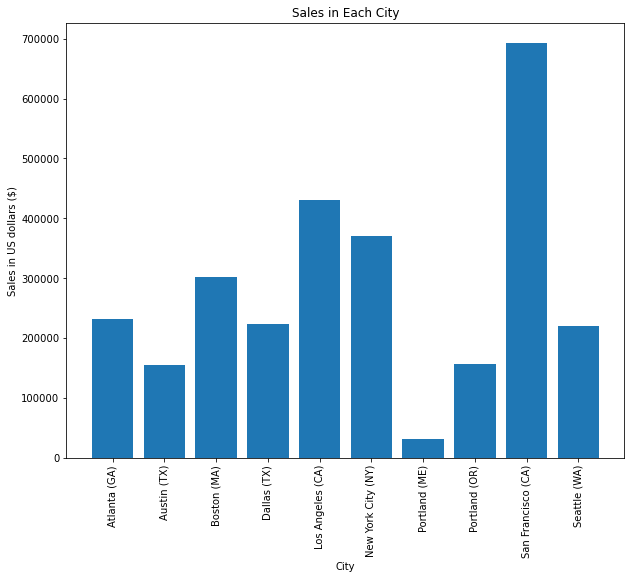

In [28]:
City_Sales = df.groupby('City').sum()['Sales']
Index = City_Sales.index

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.bar(Index, City_Sales)
ax1.set_xticklabels(Index, rotation=90)
ax1.set_xlabel('City')
ax1.set_ylabel('Sales in US dollars ($)')
ax1.set_title('Sales in Each City')


plt.show()


## Conclusion

We can see that `San Francisco` has the most sales. Because `San Francisco` is a home to many tech start-ups and all the products above are electronic products, so the consumption of these devicies in `San Francisco` is very high.

## Second question

### - What time should we display advertisements to maximize likelihood of customer's buying product?

#### Sales by each hour

We are creating a plot chart which displays the sales by each hour

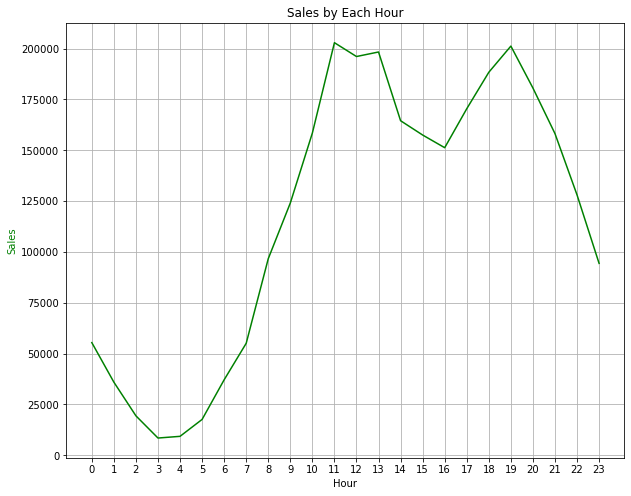

In [29]:
Hour_Sales = df.groupby('Hour').sum()['Sales']
Index = Hour_Sales.index

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.plot(Index, Hour_Sales, color='green')
ax1.set_xticks(range(len(Index)))
ax1.set_xticklabels(Index)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Sales', color='green')
ax1.set_title('Sales by Each Hour')
ax1.grid()


plt.show()

## Conclusion

We can see that the sales in 11 and 19 are the highest because these 2 hours people tend to relax and use their devices to shop online. We should display advertisements in these 2 hours to maximize likelihood of customer's buying products.

## Prospects for future work

In order for the management of Mustermann GmbH to be able to make more specific decisions based on our project, we require additional data. 

In particular on the costs of the individual products and locations. It would allow the management to make decisions about investment. 

Needed Informations, e.g.:
- expense costs
- economic efficiency per product
- costs per location
- economic efficiency per location


For a long-term business strategy we need to include the factor of the economic competition.
On the first step we would create a BCG Growth Market Share Matrix to invert purposefully into our "Stars".

Needed Informations, e.g.:
- market growth
- relative market share
